In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import PIL

try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    print('Device:', tpu.master())
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
except:
    strategy = tf.distribute.get_strategy()
print('Number of replicas:', strategy.num_replicas_in_sync)
    
print(tf.__version__)

Number of replicas: 1
2.11.0


In [ ]:
import numpy as np 
import pandas as pd 
import cv2
import matplotlib.pyplot as plt 
import seaborn as sns 
import os 
from skimage import io
from skimage.color import rgb2gray
import plotly.express as px
import random
from sklearn.utils import shuffle
import shutil
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, BatchNormalization, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.resnet import preprocess_input
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import optimizers
from keras.applications import resnet




#check tensorflow verison


In [ ]:

batch = 128
epochs = 50
num_classes=4

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
train_dataset ="/content/drive/MyDrive/Dataset/train"
val_dataset = "/content/drive/MyDrive/Dataset/test"

In [47]:
train_datagen = ImageDataGenerator(dtype='float32') #image generator assignment 
train_generator = train_datagen.flow_from_directory(train_dataset,
                                                   batch_size = batch,
                                                   target_size = (176,208),
                                                   class_mode = 'categorical') #assigning parameters to the object


valid_datagen = ImageDataGenerator(dtype='float32')
valid_generator = valid_datagen.flow_from_directory(val_dataset,
                                                   batch_size = batch,
                                                   target_size = (176,208),
                                                   class_mode = 'categorical')

Found 5121 images belonging to 4 classes.
Found 1279 images belonging to 4 classes.


In [ ]:
import numpy as np
from keras.callbacks import Callback

checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("mri_dementia_model.h5",
                                                    save_best_only=True, monitor="val_loss", mode='min')

early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=4,
                                                     restore_best_weights=True, monitor="val_loss", mode='min')
cb=[checkpoint_cb, early_stopping_cb]

In [ ]:
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, BatchNormalization,GlobalAvgPool2D
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
import keras

model = Sequential() #Sequential modeling assignemnt
model.add(Conv2D(filters=16,kernel_size=(3,3),activation='relu',input_shape=(176,208,3)))

model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(rate=0.25)) #to overcome overfitting

model.add(Flatten()) #to convert the 2d array to 1d linear array
model.add(Dense(units=64,activation='relu')) #used to 
model.add(Dropout(rate=0.25))
model.add(Dense(units=4,activation='softmax')) #for multi-classification
model.summary()


adam_optimizer = tf.keras.optimizers.Adam(learning_rate= 0.0001, 
                                         ) #to adjust parameter and maximize loss fucntion
    
model.compile(optimizer=adam_optimizer, 
                         loss='categorical_crossentropy',
                         metrics=['accuracy']) #need to update to use f1 score too

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 174, 206, 16)      448       
                                                                 
 conv2d_5 (Conv2D)           (None, 172, 204, 32)      4640      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 86, 102, 32)      0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 84, 100, 64)       18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 42, 50, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 40, 48, 128)      

In [ ]:
history=model.fit(train_generator,epochs=epochs,verbose=1,validation_data=valid_generator,callbacks=cb)

Epoch 1/50
41/41 [==============================] - 29s 649ms/step - loss: 5.7894 - accuracy: 0.4396 - val_loss: 1.0316 - val_accuracy: 0.5004
Epoch 2/50
41/41 [==============================] - 26s 636ms/step - loss: 1.1071 - accuracy: 0.4999 - val_loss: 1.0203 - val_accuracy: 0.5004
Epoch 3/50
41/41 [==============================] - 19s 454ms/step - loss: 1.0894 - accuracy: 0.4999 - val_loss: 1.0000 - val_accuracy: 0.5004
Epoch 4/50
41/41 [==============================] - 23s 563ms/step - loss: 1.0250 - accuracy: 0.4999 - val_loss: 0.9835 - val_accuracy: 0.5004
Epoch 5/50
41/41 [==============================] - 21s 502ms/step - loss: 0.9559 - accuracy: 0.4999 - val_loss: 0.9531 - val_accuracy: 0.5004
Epoch 6/50
41/41 [==============================] - 33s 801ms/step - loss: 0.9435 - accuracy: 0.5015 - val_loss: 0.9424 - val_accuracy: 0.5004
Epoch 7/50
41/41 [==============================] - 21s 504ms/step - loss: 0.9104 - accuracy: 0.5196 - val_loss: 0.9172 - val_accuracy: 0.5004

In [ ]:

model.save('riyas.h5')

In [24]:
from tensorflow.keras.models import load_model

In [25]:
model = load_model('/content/riyas.h5')

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 174, 206, 16)      448       
                                                                 
 conv2d_5 (Conv2D)           (None, 172, 204, 32)      4640      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 86, 102, 32)      0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 84, 100, 64)       18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 42, 50, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 40, 48, 128)      

In [27]:
pre = np.argmax(model.predict(train_generator), axis = 1)

41/41 [==============================] - 14s 339ms/step


In [28]:
pre

array([2, 2, 2, ..., 3, 2, 2])

In [31]:
class_names = list(train_generator.class_indices.keys())
class_names

['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']

In [30]:
train_generator.labels

array([0, 0, 0, ..., 3, 3, 3], dtype=int32)

In [33]:
from sklearn.metrics import classification_report, accuracy_score

train_pre = np.argmax(model.predict(train_generator), axis = 1)
report = classification_report(train_generator.labels, train_pre, target_names= class_names)
report

41/41 [==============================] - 14s 329ms/step


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'                  precision    recall  f1-score   support\n\n    MildDemented       0.00      0.00      0.00       717\nModerateDemented       0.00      0.00      0.00        52\n     NonDemented       0.50      0.92      0.65      2560\nVeryMildDemented       0.37      0.09      0.15      1792\n\n        accuracy                           0.49      5121\n       macro avg       0.22      0.25      0.20      5121\n    weighted avg       0.38      0.49      0.38      5121\n'

41/41 [==============================] - 14s 332ms/step
Test Accuracy: 48.506%


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


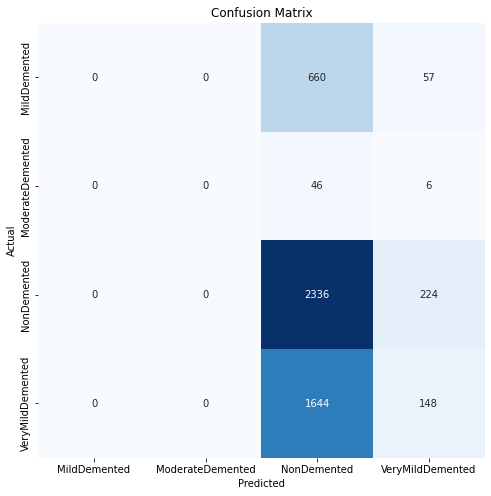

Classification Report:
----------------------
                   precision    recall  f1-score   support

    MildDemented       0.00      0.00      0.00       717
ModerateDemented       0.00      0.00      0.00        52
     NonDemented       0.50      0.91      0.64      2560
VeryMildDemented       0.34      0.08      0.13      1792

        accuracy                           0.49      5121
       macro avg       0.21      0.25      0.19      5121
    weighted avg       0.37      0.49      0.37      5121



In [35]:
from sklearn.metrics import classification_report, accuracy_score

train_pre = np.argmax(model.predict(train_generator), axis = 1)

acc = accuracy_score(train_generator.labels, train_pre)
cm = tf.math.confusion_matrix(train_generator.labels, train_pre)
clr = classification_report(train_generator.labels, train_pre, target_names=class_names)

print("Test Accuracy: {:.3f}%".format(acc * 100))

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks= np.arange(4) + 0.5, labels=class_names)
plt.yticks(ticks= np.arange(4) + 0.5, labels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual") 
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)

In [40]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image, image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow import keras
import tensorflow 
import warnings

In [38]:
vgg = VGG19(input_shape=(176,208,3), weights='imagenet', include_top=False)
for layer in vgg.layers:
    layer.trainable = False
x = Flatten()(vgg.output)

prediction = Dense(4, activation='softmax')(x)

modelvgg = Model(inputs=vgg.input, outputs=prediction)
modelvgg.summary()

80134624/80134624 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 176, 208, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 176, 208, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 176, 208, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 88, 104, 64)       0         
                                                                 
 block2_conv1 (Conv2D)       (None, 88, 104, 128)      73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 88, 104, 128)      147584    
                                                              

In [41]:
import scipy
print("Num GPUs Available: ", len(tensorflow.config.list_physical_devices('GPU')))


seed = 1842
tensorflow.random.set_seed(seed)
np.random.seed(seed)
warnings.simplefilter('ignore')

Num GPUs Available:  1


In [61]:
train_dataset ="/content/drive/MyDrive/Dataset/train"
val_dataset = "/content/drive/MyDrive/Dataset/test"

In [62]:
train_datagen = ImageDataGenerator(rescale=1/255, validation_split=0.2) #image generator assignment 
train_generator = train_datagen.flow_from_directory(train_dataset,
                                                   batch_size = batch,
                                                   subset="training",
                                                   target_size = (176,208),
                                                   class_mode = 'categorical') #assigning parameters to the object



valid_generator = train_datagen.flow_from_directory(train_dataset,
                                                   batch_size = batch,
                                                   target_size = (176,208),
                                                     subset="validation",
                                                      shuffle=False,
                                                   class_mode = 'categorical')



image_generator_submission = ImageDataGenerator(rescale=1/255) 
submission = image_generator_submission.flow_from_directory(
                                                 directory=val_dataset,
                                                 shuffle=False,
                                                 target_size=(176,208), 
                                                 class_mode='categorical')

Found 4098 images belonging to 4 classes.
Found 1023 images belonging to 4 classes.
Found 1279 images belonging to 4 classes.


In [54]:
batch_1_img = train_generator[0]
batch_1_img[0]


'/'

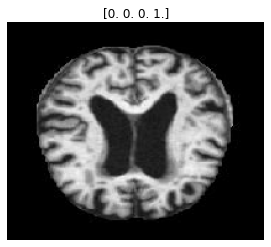

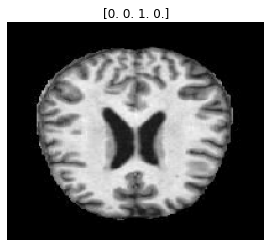

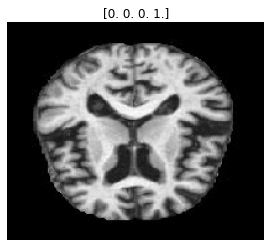

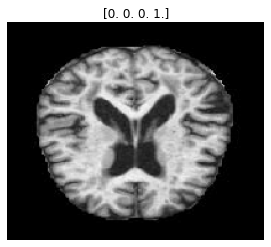

In [63]:
#show flwoers for the first batch

batch_1_img = train_generator[0]
for i in range(0,4):
    img = batch_1_img[0][i]
    lab = batch_1_img[1][i]
    plt.imshow(img)
    plt.title(lab)
    plt.axis('off')
    plt.show()

In [64]:
vgg = VGG19(input_shape=(176,208,3), weights='imagenet', include_top=False)
for layer in vgg.layers:
    layer.trainable = False
x = Flatten()(vgg.output)

prediction = Dense(4, activation='softmax')(x)

modelvgg = Model(inputs=vgg.input, outputs=prediction)
modelvgg.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 176, 208, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 176, 208, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 176, 208, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 88, 104, 64)       0         
                                                                 
 block2_conv1 (Conv2D)       (None, 88, 104, 128)      73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 88, 104, 128)      147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 44, 52, 128)       0   

In [65]:
modelvgg.compile(optimizer='adam',
loss=tensorflow.losses.CategoricalCrossentropy(),
metrics=[keras.metrics.AUC(name='auc')])

In [66]:
history = modelvgg.fit(train_generator, epochs=40, validation_data=valid_generator)

Epoch 1/40
33/33 [==============================] - 38s 899ms/step - loss: 1.1685 - auc: 0.7927 - val_loss: 1.1480 - val_auc: 0.7421
Epoch 2/40
33/33 [==============================] - 22s 662ms/step - loss: 0.8424 - auc: 0.8695 - val_loss: 1.2485 - val_auc: 0.7917
Epoch 3/40
33/33 [==============================] - 24s 719ms/step - loss: 0.7732 - auc: 0.8911 - val_loss: 1.1080 - val_auc: 0.7685
Epoch 4/40
33/33 [==============================] - 21s 631ms/step - loss: 0.6513 - auc: 0.9289 - val_loss: 1.0686 - val_auc: 0.8004
Epoch 5/40
33/33 [==============================] - 21s 633ms/step - loss: 0.6088 - auc: 0.9387 - val_loss: 1.0833 - val_auc: 0.7914
Epoch 6/40
33/33 [==============================] - 21s 639ms/step - loss: 0.6615 - auc: 0.9197 - val_loss: 1.0457 - val_auc: 0.8078
Epoch 7/40
33/33 [==============================] - 21s 635ms/step - loss: 0.5980 - auc: 0.9358 - val_loss: 1.0456 - val_auc: 0.8123
Epoch 8/40
33/33 [==============================] - 22s 668ms/step - 

In [67]:
modelvgg.save('mritest.h5')

In [68]:
loss, accuracy = modelvgg.evaluate(valid_generator)
print("Loss: ", loss)
print("Accuracy: ", accuracy)

8/8 [==============================] - 4s 491ms/step - loss: 0.8531 - auc: 0.8764
Loss:  0.8530921936035156
Accuracy:  0.8763989806175232
